In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
%matplotlib inline
np.random.seed(1)
import pandas as pd

# DATA LOAD

In [2]:
train_x=pd.read_csv('D:/c/Desktop/PIAIC/Models/dataset/sign-language-mnist/sign_mnist_train.csv',delimiter=',')
train_x.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
#train_label=train[:,:1]
#train_label

# Data from csv load in array

In [4]:
train=pd.read_csv('D:/c/Desktop/PIAIC/Models/dataset/sign-language-mnist/sign_mnist_train.csv',delimiter=',').values
test=pd.read_csv('D:/c/Desktop/PIAIC/Models/dataset/sign-language-mnist/sign_mnist_train.csv',delimiter=',').values


# Samples

In [5]:
sample_train=train[:,1:]
print(sample_train.shape)
sample_test=test[:,1:]

(27455, 784)


# labels

In [6]:
sample_label=train[:,0]
test_label=test[:,0]

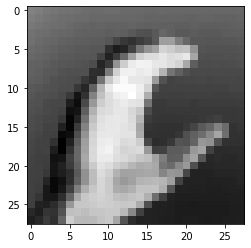

In [7]:
x_tra=sample_train[66]
x_tra
a=np.array(x_tra)
s=np.reshape(a,(28,28))
import matplotlib.pyplot as plt
plt.imshow(s, cmap=plt.cm.binary)
plt.show()

# Train adn Validation data

In [8]:
'''train=sample_train[:21964,:]
valid=sample_train[21964:,:]
train_label=sample_label[:21964]
valid_label=sample_label[21964:]
'''''

'train=sample_train[:21964,:]\nvalid=sample_train[21964:,:]\ntrain_label=sample_label[:21964]\nvalid_label=sample_label[21964:]\n'

# Reshape and normalize training data

In [9]:
xtrain=sample_train.reshape(sample_train.shape[0],28, 28,1).astype( 'float32' )
X_train = xtrain / 255.0
#xvalid=valid.reshape(valid.shape[0],28, 28).astype( 'float32' )
#X_valid = xvalid / 255.0


from keras.utils import to_categorical
train_labels = to_categorical(sample_label)
#valid_labels=to_categorical(valid_label)
test_labels = to_categorical(test_label)

Using TensorFlow backend.


In [10]:
xtest=sample_test.reshape(test.shape[0],28, 28,1).astype( 'float32' )
X_test = xtest / 255.0

In [11]:
print ("number of training examples = " + str(train.shape[0]))
print ("number of test examples = " + str(sample_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(train_labels.shape))
#print ("X_test shape: " + str(X_valid.shape))
#print ("Y_test shape: " + str(valid_labels.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(test_labels.shape))

number of training examples = 27455
number of test examples = 27455
X_train shape: (27455, 28, 28, 1)
Y_train shape: (27455, 25)
X_test shape: (27455, 28, 28, 1)
Y_test shape: (27455, 25)


In [12]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(28, 28,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Dense Classifier
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

# Compile model


In [14]:
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [15]:
hist=model.fit(X_train, train_labels, epochs=5, batch_size=200,validation_split=0.2)

Train on 21964 samples, validate on 5491 samples
Epoch 1/5
21964/21964 [==============================] - 111s 5ms/step - loss: 1.2394 - accuracy: 0.6240 - val_loss: 0.1334 - val_accuracy: 0.9587
Epoch 2/5
21964/21964 [==============================] - 115s 5ms/step - loss: 0.0367 - accuracy: 0.9909 - val_loss: 0.0046 - val_accuracy: 0.9995
Epoch 3/5
21964/21964 [==============================] - 185s 8ms/step - loss: 0.0178 - accuracy: 0.9962 - val_loss: 7.6806e-04 - val_accuracy: 1.0000
Epoch 4/5
21964/21964 [==============================] - 200s 9ms/step - loss: 2.9018e-04 - accuracy: 1.0000 - val_loss: 1.7865e-04 - val_accuracy: 1.0000
Epoch 5/5
21964/21964 [==============================] - 201s 9ms/step - loss: 1.1960e-04 - accuracy: 1.0000 - val_loss: 1.0427e-04 - val_accuracy: 1.0000


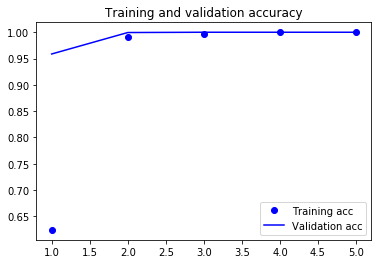

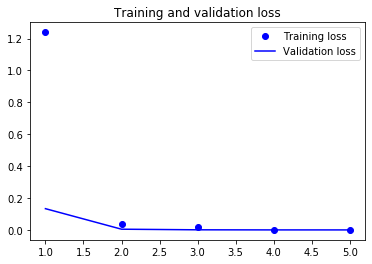

In [16]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [19]:
score = model.evaluate(X_test, test_labels, batch_size=128)

27455/27455 [==============================] - 29s 1ms/step


In [20]:
score

[9.131203820782899e-05, 1.0]

# Saving the model

In [39]:
model.save('Sign_dataset_CNN_1.h5')

In [48]:
import cv2
img = cv2.imread('D:/c/Desktop/PIAIC/Models/dataset/sign-language-mnist/C.png')
img_gray = np.mean(img, axis=2)
resized = cv2.resize(img_gray, (28,28), interpolation = cv2.INTER_AREA)

In [49]:
from tensorflow.keras.preprocessing import image
import numpy as np
#img=image.load_img(img,target_size=(28,28))
img_tensor=image.img_to_array(resized)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255
print(img_tensor.shape)
pred=model.predict(img_tensor)
print(pred.argmax())

(1, 28, 28, 1)
19


19


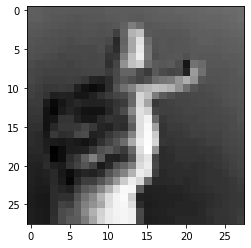

In [38]:
image_index = 19
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())